<h1 style="color:red;" >  EDA - Forest Fire Data Set </h1>

<h4  style="color: Black;">Import packages.</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import statistics as st
from scipy import stats
from IPython.display import display
pd.options.display.max_columns = 100 #(to unlimit the varibles)
pd.set_option('display.max_rows', None)
import statsmodels.api as sm
from sklearn import metrics  

In [2]:
forestfire = pd.read_csv("../Data/Forest-Fire-prediction/forestfires.csv")

In [3]:
forestfire.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
#forestfire[forestfire['month']=='mar']

In [22]:
forestfire.iloc[:,:1]

,X
0,7
1,7
2,7
3,8
4,8
5,8
6,8
7,8
8,8
9,7


In [16]:
target_col = forestfire.iloc[ :, -1:]

In [17]:
target_col


,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.00
9,0.00


In [219]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [220]:
forestfire.describe(include = "all")

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [221]:
forestfire.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

<h3> Univariate analysis</h3>

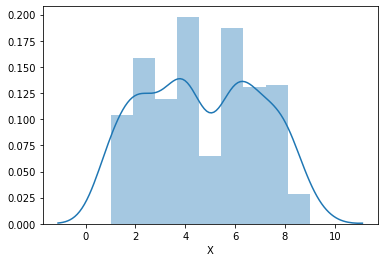

In [222]:
#forestfire['X'].plot.hist(bins = 10)

sns.distplot(forestfire['X'])
plt.show()

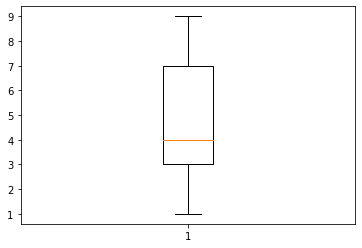

In [223]:
plt.boxplot(forestfire['X']) 
plt.show() 

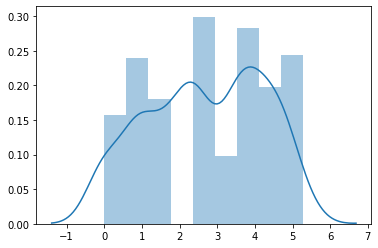

In [224]:
Sample_transformed, lambd = stats.boxcox(forestfire['X'])
sns.distplot(Sample_transformed)


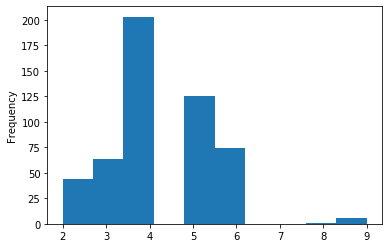

In [225]:
forestfire['Y'].plot.hist(bins = 10)


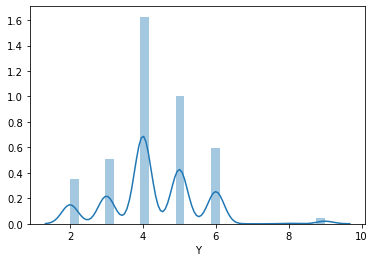

In [226]:
sns.distplot(forestfire['Y'])
plt.show()

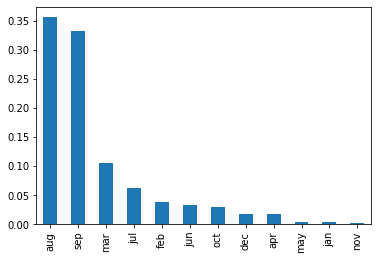

In [227]:
(forestfire['month'].value_counts()/len(forestfire['month']*100)).plot.bar()

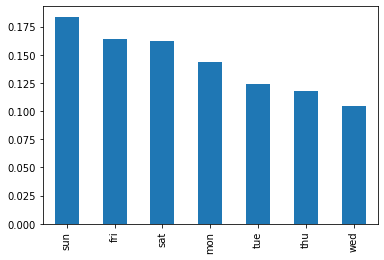

In [228]:
(forestfire['day'].value_counts()/len(forestfire['day']*100)).plot.bar()

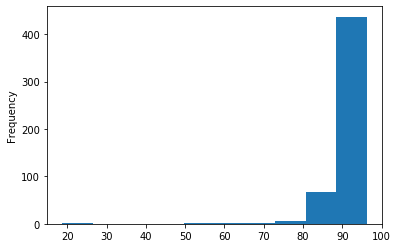

In [229]:
forestfire['FFMC'].plot.hist(bins = 10)

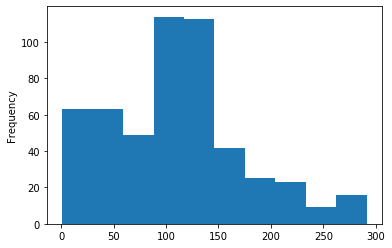

In [230]:
forestfire['DMC'].plot.hist(bins = 10)

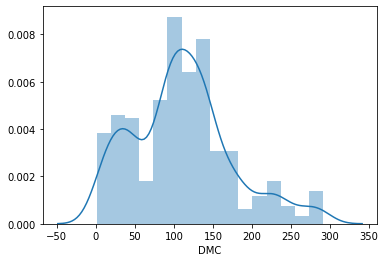

In [231]:

sns.distplot(forestfire['DMC'])
plt.show()

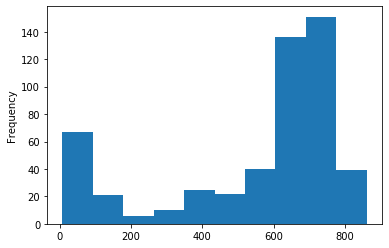

In [232]:
forestfire['DC'].plot.hist(bins = 10)

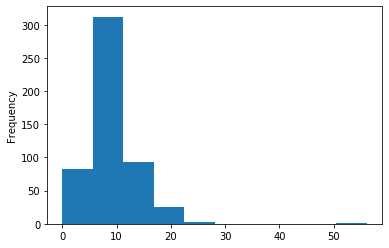

In [233]:
forestfire['ISI'].plot.hist(bins = 10)

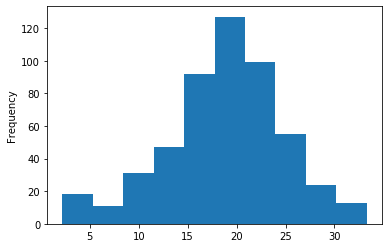

In [234]:
forestfire['temp'].plot.hist(bins = 10)

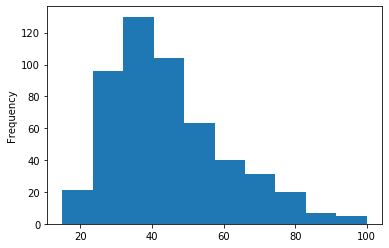

In [235]:
forestfire['RH'].plot.hist(bins = 10)

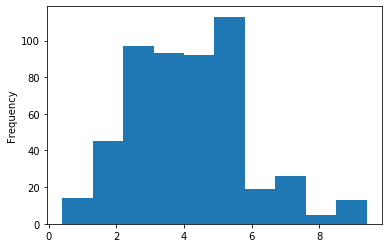

In [236]:
forestfire['wind'].plot.hist(bins = 10)

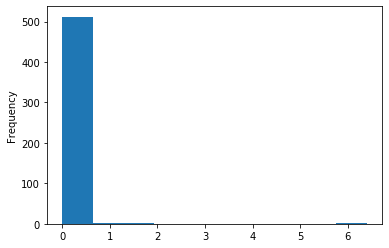

In [237]:
forestfire['rain'].plot.hist(bins = 10)

Distribution of Output variable

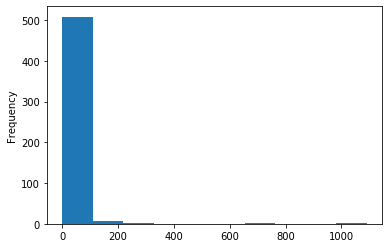

In [238]:
forestfire['area'].plot.hist(bins = 10)

<h3> Bi variate - Anlaysis </h3>

In [239]:
"""x = forestfire['X']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ X and area')
plt.legend(loc=0)

plt.xlabel("X")
plt.ylabel("area")
plt.show()"""

'x = forestfire[\'X\']\ny = forestfire[\'area\']\nplt.figure(figsize =  (30, 10))\nplt.scatter(x,y, alpha= 1, edgecolors=\'none\', s=50)\nplt.title(\'Relation_btw_ X and area\')\nplt.legend(loc=0)\n\nplt.xlabel("X")\nplt.ylabel("area")\nplt.show()'

In [240]:
"""x = forestfire['Y']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ Y and area')
plt.legend(loc=0)

plt.xlabel("Y")
plt.ylabel("area")
plt.show()"""

'x = forestfire[\'Y\']\ny = forestfire[\'area\']\nplt.figure(figsize =  (30, 10))\nplt.scatter(x,y, alpha= 1, edgecolors=\'none\', s=50)\nplt.title(\'Relation_btw_ Y and area\')\nplt.legend(loc=0)\n\nplt.xlabel("Y")\nplt.ylabel("area")\nplt.show()'

No handles with labels found to put in legend.


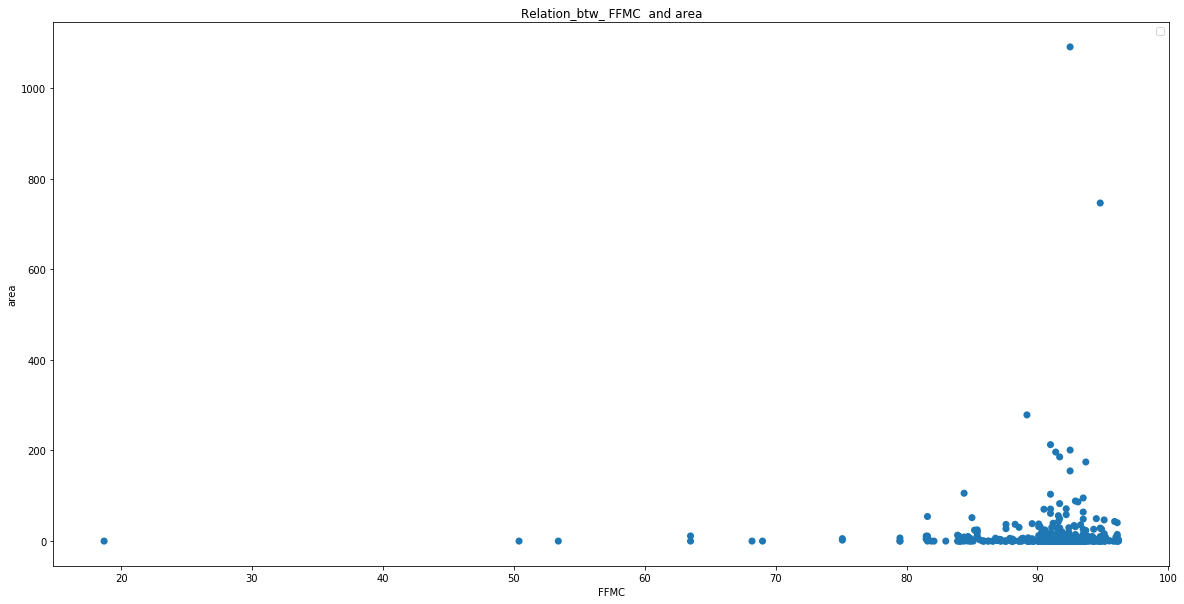

In [241]:
x = forestfire['FFMC']
y = forestfire['area']
plt.figure(figsize =  (20, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ FFMC  and area')
plt.legend(loc=0)

plt.xlabel("FFMC")
plt.ylabel("area")
plt.show()

No handles with labels found to put in legend.


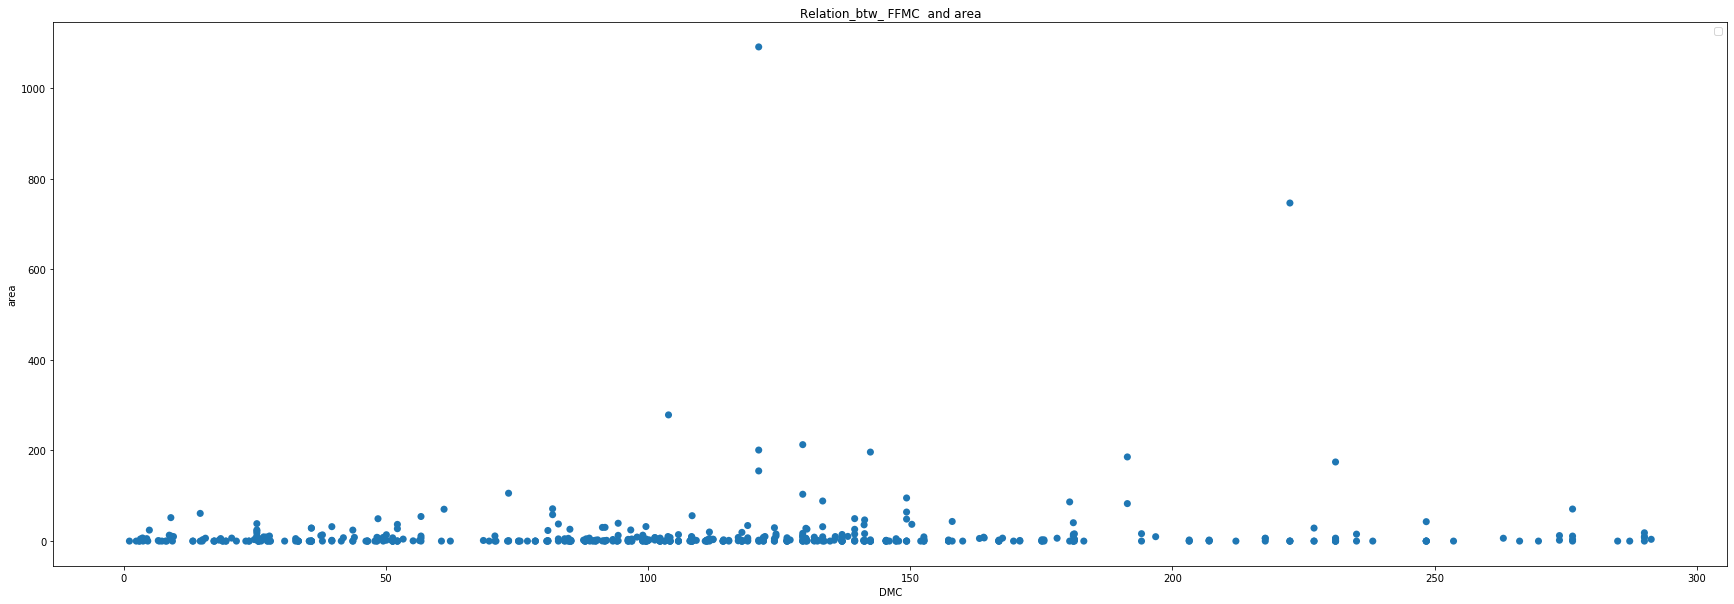

In [242]:
x = forestfire['DMC']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ FFMC  and area')
plt.legend(loc=0)

plt.xlabel("DMC")
plt.ylabel("area")
plt.show()

No handles with labels found to put in legend.


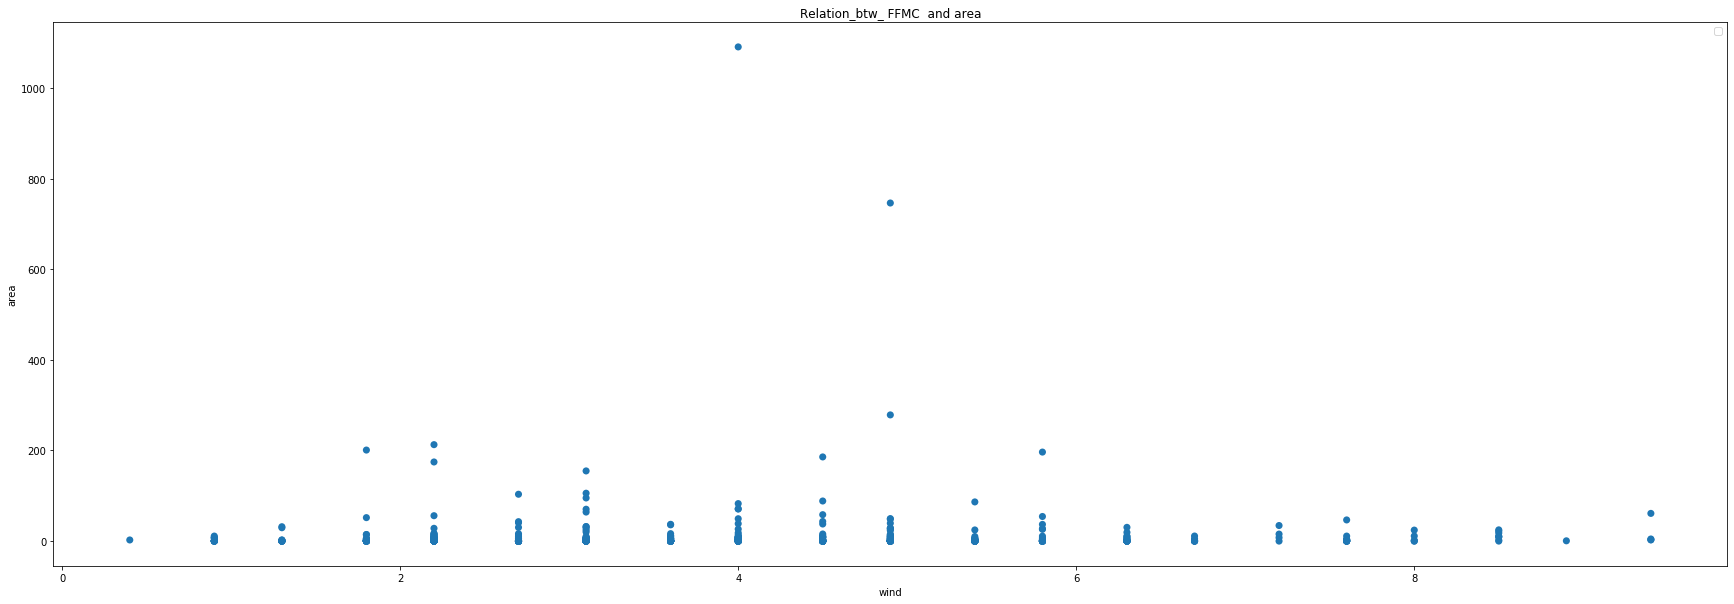

In [243]:
x = forestfire['wind']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ FFMC  and area')
plt.legend(loc=0)

plt.xlabel("wind")
plt.ylabel("area")
plt.show()

No handles with labels found to put in legend.


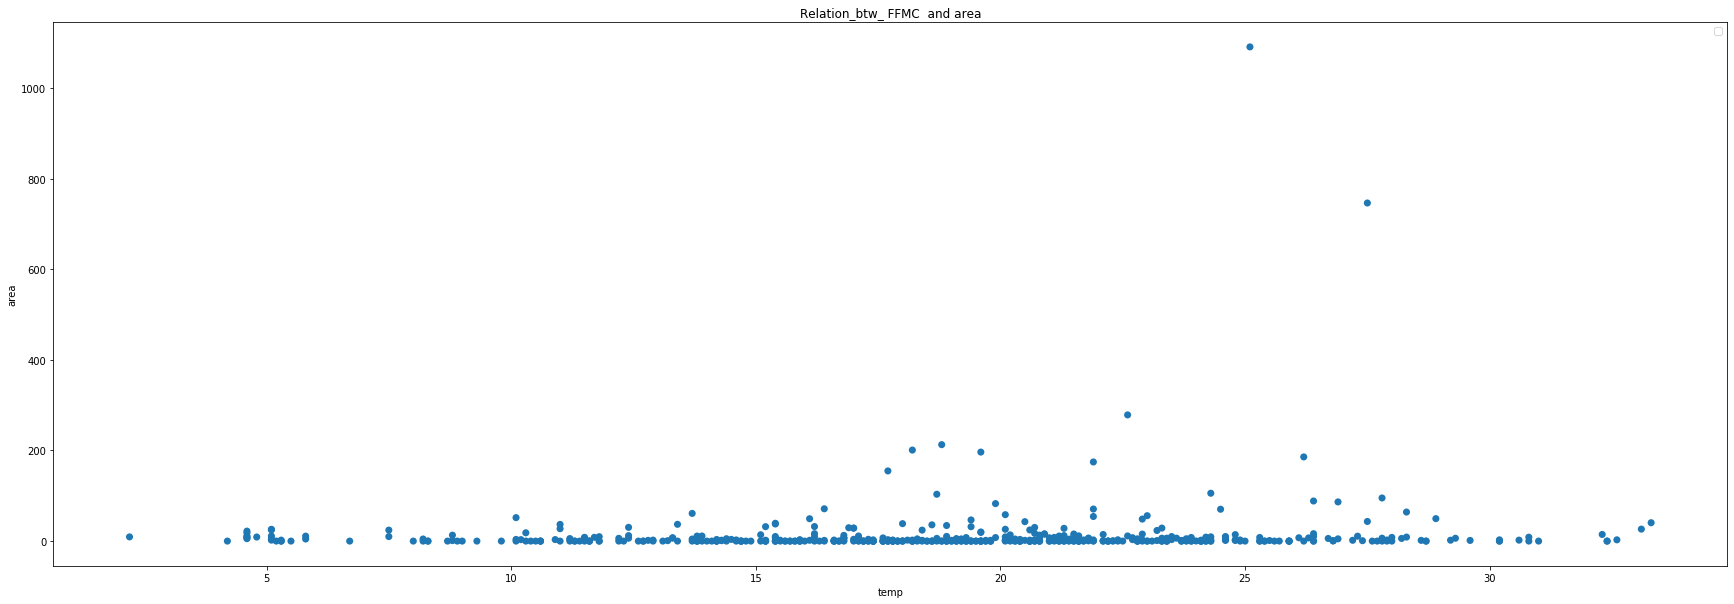

In [244]:
x = forestfire['temp']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ FFMC  and area')
plt.legend(loc=0)

plt.xlabel("temp")
plt.ylabel("area")
plt.show()

No handles with labels found to put in legend.


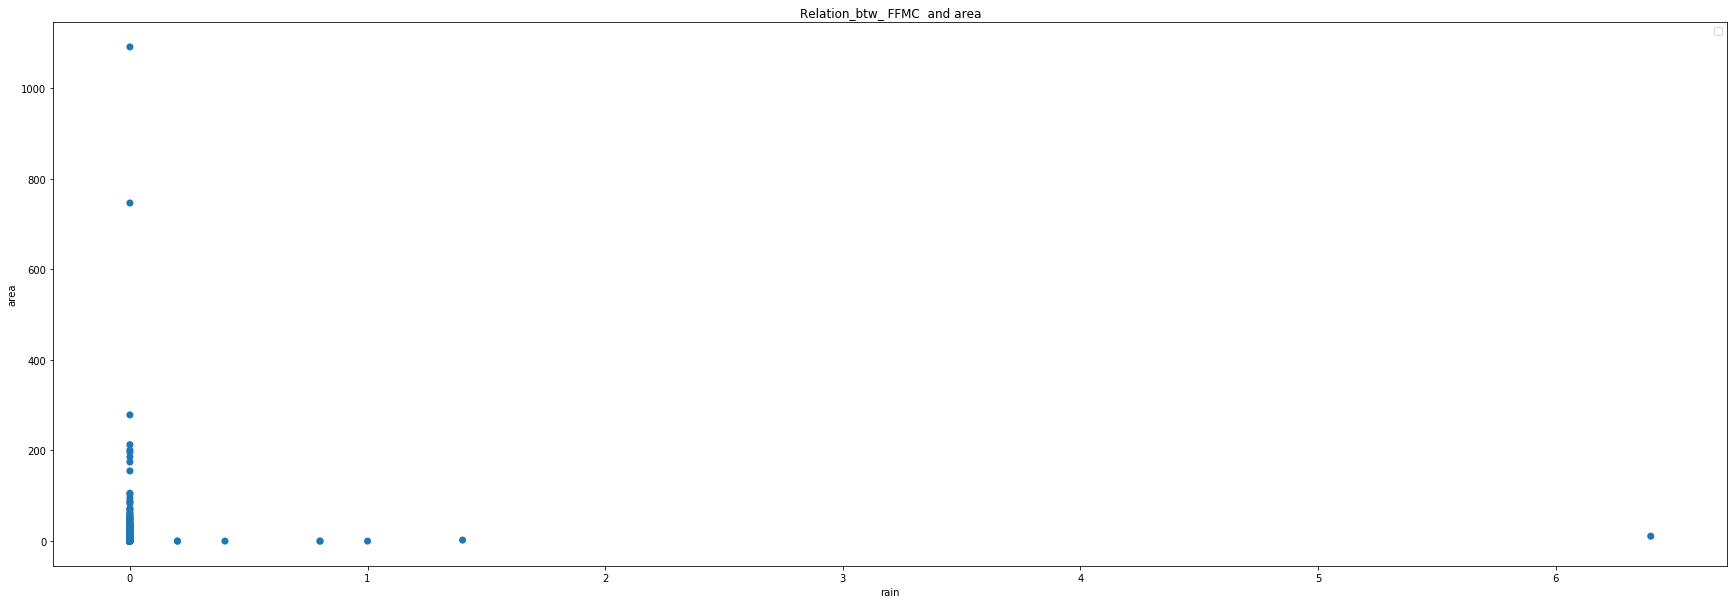

In [245]:
x = forestfire['rain']
y = forestfire['area']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha= 1, edgecolors='none', s=50)
plt.title('Relation_btw_ FFMC  and area')
plt.legend(loc=0)

plt.xlabel("rain")
plt.ylabel("area")
plt.show()

Find Multi collinearity

In [246]:
forestfire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [247]:
cleanup_nums = {
                "month": {"mar":3, "oct":10, "aug":8, "sep":9, "apr":4, "jun":6, "jul":7, "feb":2, "jan":1,
       "dec":12, "may":5, "nov":11 }}

In [248]:
forestfire.replace(cleanup_nums,inplace=True)

In [249]:
forestfire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


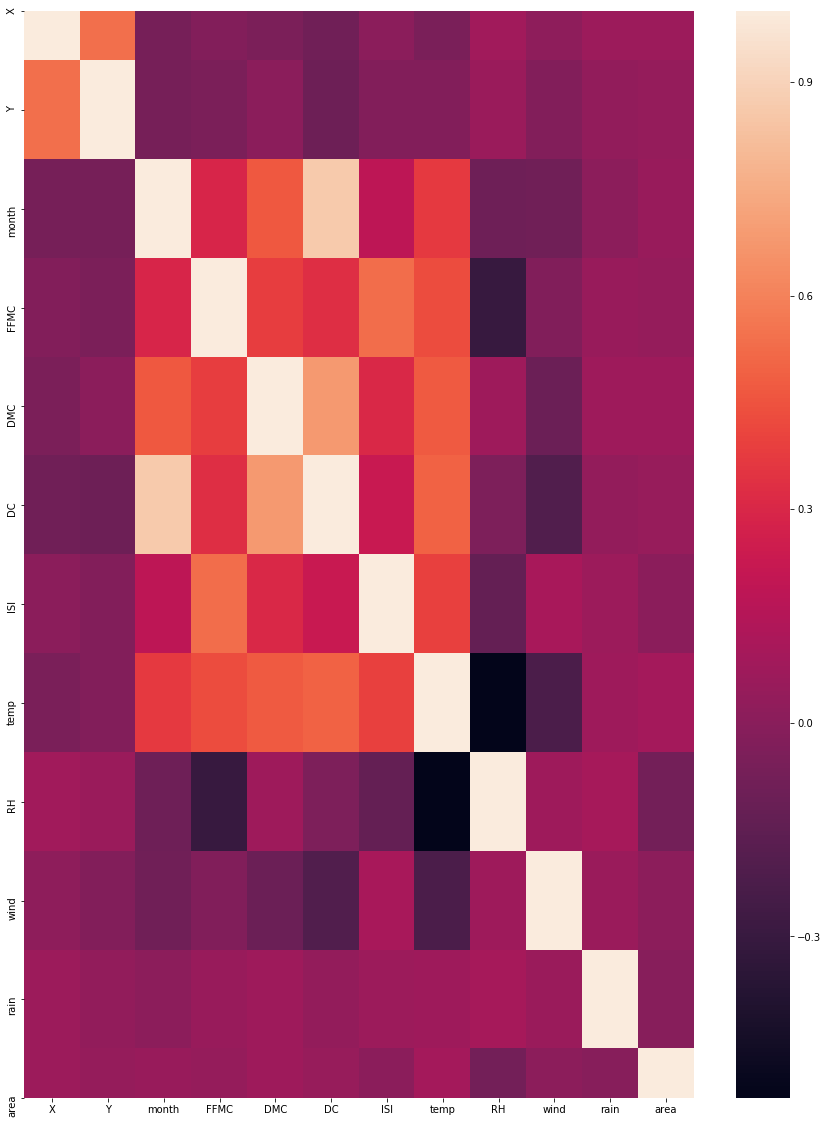

In [250]:
corr = forestfire.corr()
plt.figure(figsize=(15,20))
sns.heatmap(forestfire.corr())

In [251]:
corr.to_excel("../output/forestfires - correlation.xlsx")

In [252]:
forestfire[(forestfire['area'] > 0) & (forestfire['area'] < 600) & (forestfire['FFMC'] > 75)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,7,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,9,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,9,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,8,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,8,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
143,1,2,7,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71
144,2,5,8,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77
145,6,5,8,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90
146,5,4,3,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95
147,8,3,9,tue,84.4,73.4,671.9,3.2,24.2,28,3.6,0.0,0.96


In [253]:
forestfire.shape

(517, 13)

In [254]:
X= forestfire.drop(['area'], axis = 1)
Y = forestfire[['area']]
names  = list(X.columns)

In [255]:
inp_df = pd.DataFrame(X, columns = names)

In [256]:
dummy1 = pd.get_dummies(inp_df['day'], drop_first=True)
inp_df =  pd.concat([dummy1, inp_df], axis =1 )

In [257]:
inp_df.head()

,mon,sat,sun,thu,tue,wed,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,0,0,0,0,0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,0,0,0,0,1,0,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,0,1,0,0,0,0,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,0,0,0,0,0,0,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,0,0,1,0,0,0,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [258]:
inp_df = inp_df.drop(['day'],  axis = 1) 

In [259]:
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 17 columns):
mon      517 non-null uint8
sat      517 non-null uint8
sun      517 non-null uint8
thu      517 non-null uint8
tue      517 non-null uint8
wed      517 non-null uint8
X        517 non-null int64
Y        517 non-null int64
month    517 non-null int64
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
dtypes: float64(7), int64(4), uint8(6)
memory usage: 47.6 KB


In [260]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = inp_df.columns
vif["vif_Factor"] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])]
vif"""

'from statsmodels.stats.outliers_influence import variance_inflation_factor\nvif = pd.DataFrame()\nvif["features"] = inp_df.columns\nvif["vif_Factor"] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])]\nvif'

In [261]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(inp_df, y, test_size=0.25, random_state=44)

In [262]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(sv_train,tv_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
import statsmodels.regression.linear_model as sm
from sklearn import datasets, linear_model,metrics
#import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = tv_train, exog = sv_train).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   area   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.099
Method:                 Least Squares   F-statistic:                              3.504
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                    4.18e-06
Time:                        12:31:20   Log-Likelihood:                         -1822.9
No. Observations:                 387   AIC:                                      3680.
Df Residuals:                     370   BIC:                                      3747.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mon            4.7086      5.276      0.892      0.373      -5.666      15.083
sat            6.3278      5.019      1.261      0.208      -3.541      16.197
sun            4.0796      4.848      0.842      0.401      -5.453      13.613
thu           -2.0885      5.699     -0.366      0.714     -13.295       9.118
tue            4.0285      5.506      0.732      0.465      -6.798      14.855
wed            4.0809      5.709      0.715      0.475      -7.145      15.306
X              0.9953      0.720      1.382      0.168      -0.421       2.412
Y             -0.4584      1.394     -0.329      0.743      -3.200       2.284
month          1.9024      1.403      1.356      0.176      -0.856       4.661
FFMC          -0.1153      0.134     -0.861      0.390      -0.379       0.148
DMC            0.0491      0.034      1.464      0.144      -0.017       0.115
DC            -0.0223      0.016     -1.386      0.167      -0.054       0.009
ISI           -0.4164      0.343     -1.216      0.225      -1.090       0.257
temp           0.4457      0.386      1.154      0.249      -0.314       1.205
RH            -0.0237      0.104     -0.227      0.821      -0.229       0.182
wind           0.7039      0.857      0.821      0.412      -0.982       2.390
rain          -1.3459      4.268     -0.315      0.753      -9.738       7.046
==============================================================================
Omnibus:                      458.782   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26674.164
Skew:                           5.554   Prob(JB):                         0.00
Kurtosis:                      42.126   Cond. No.                     4.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

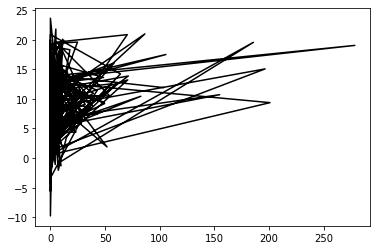

In [271]:
plt.plot(tv_train, lreg.predict(sv_train), color='k')


In [267]:
from sklearn.ensemble import RandomForestRegressor

Rregr = RandomForestRegressor(n_estimators=25)
Rregr.fit(sv_train,tv_train)


RF_Prediction_sv_train  = Rregr.predict(sv_train)

RF_Prediction_sv_test = Rregr.predict(sv_test)

print(metrics.mean_absolute_error(tv_train,RF_Prediction_sv_train ))
print(metrics.mean_absolute_error(tv_test, RF_Prediction_sv_test) )


5.884829422911284
28.17154728205128


In [ ]:
from sklearn import r2_score 
R2 = r2_score(svtrain - )